In [1]:
import pandas as pd
import os

In [56]:
sp500 = pd.read_csv('sp500.csv')



In [57]:
sp500

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1,1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
2,1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
3,1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
4,1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...,...
24058,2023-10-10 00:00:00-04:00,4339.750000,4385.459961,4339.640137,4358.240234,3520240000,0.0,0.0
24059,2023-10-11 00:00:00-04:00,4366.589844,4378.640137,4345.339844,4376.950195,3601660000,0.0,0.0
24060,2023-10-12 00:00:00-04:00,4380.939941,4385.850098,4325.430176,4349.609863,3713140000,0.0,0.0
24061,2023-10-13 00:00:00-04:00,4360.490234,4377.100098,4311.970215,4327.779785,0,0.0,0.0


In [58]:
sp500['Date'] = pd.to_datetime(sp500['Date'])

In [59]:
sp500['Date'] = pd.to_datetime(sp500['Date'],utc=True).dt.date

In [60]:
sp500

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...,...
24058,2023-10-10,4339.750000,4385.459961,4339.640137,4358.240234,3520240000,0.0,0.0
24059,2023-10-11,4366.589844,4378.640137,4345.339844,4376.950195,3601660000,0.0,0.0
24060,2023-10-12,4380.939941,4385.850098,4325.430176,4349.609863,3713140000,0.0,0.0
24061,2023-10-13,4360.490234,4377.100098,4311.970215,4327.779785,0,0.0,0.0


In [61]:
sp500 = sp500.set_index('Date')

In [62]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-10-10,4339.750000,4385.459961,4339.640137,4358.240234,3520240000,0.0,0.0
2023-10-11,4366.589844,4378.640137,4345.339844,4376.950195,3601660000,0.0,0.0
2023-10-12,4380.939941,4385.850098,4325.430176,4349.609863,3713140000,0.0,0.0


<Axes: xlabel='Date'>

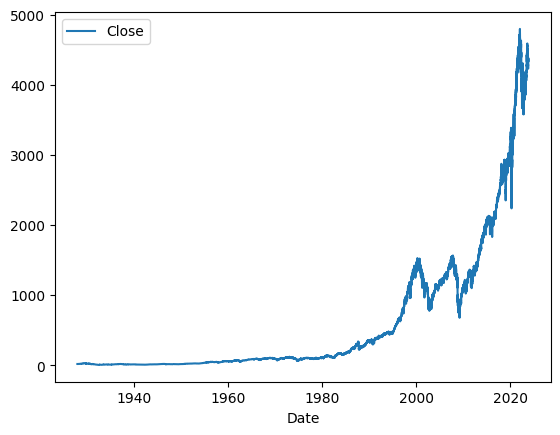

In [63]:
sp500.plot.line(y="Close", use_index=True)

In [64]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [65]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [66]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2023-10-10,4339.750000,4385.459961,4339.640137,4358.240234,3520240000,4376.950195
2023-10-11,4366.589844,4378.640137,4345.339844,4376.950195,3601660000,4349.609863
2023-10-12,4380.939941,4385.850098,4325.430176,4349.609863,3713140000,4327.779785


In [67]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [68]:
sp500.head()

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06,17.660000,17.660000,17.660000,17.660000,0,17.500000,0


In [75]:
sp500.index = pd.to_datetime(sp500.index)

In [76]:
sp500 = sp500.loc["1990-01-01":].copy()

In [77]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-10-10,4339.750000,4385.459961,4339.640137,4358.240234,3520240000,4376.950195,1
2023-10-11,4366.589844,4378.640137,4345.339844,4376.950195,3601660000,4349.609863,0
2023-10-12,4380.939941,4385.850098,4325.430176,4349.609863,3713140000,4327.779785,0


In [78]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [79]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.5277777777777778

<Axes: xlabel='Date'>

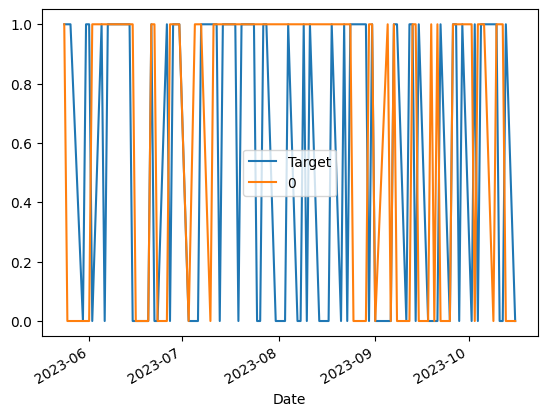

In [80]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()


In [81]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [82]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [83]:
predictions = backtest(sp500, model, predictors)

In [84]:
predictions["Predictions"].value_counts()

Predictions
0    3439
1    2574
Name: count, dtype: int64

In [85]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5283605283605284

In [86]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.533677
0    0.466323
Name: count, dtype: float64

In [87]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors+= [ratio_column, trend_column]

In [88]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-10,4339.750000,4385.459961,4339.640137,4358.240234,3520240000,4376.950195,1,1.002597,2.0,1.012398,4.0,0.981834,30.0,1.051170,126.0,1.118807,532.0
2023-10-11,4366.589844,4378.640137,4345.339844,4376.950195,3601660000,4349.609863,0,1.002142,2.0,1.011425,4.0,0.986708,30.0,1.054868,127.0,1.123215,532.0
2023-10-12,4380.939941,4385.850098,4325.430176,4349.609863,3713140000,4327.779785,0,0.996867,1.0,1.000878,4.0,0.981342,29.0,1.047593,126.0,1.115812,532.0


In [89]:
sp500 = sp500.dropna()

In [90]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-09,4289.020020,4341.729980,4283.790039,4335.660156,3174630000,4358.240234,1,1.003142,2.0,1.013215,3.0,0.976144,30.0,1.046500,125.0,1.113403,531.0
2023-10-10,4339.750000,4385.459961,4339.640137,4358.240234,3520240000,4376.950195,1,1.002597,2.0,1.012398,4.0,0.981834,30.0,1.051170,126.0,1.118807,532.0
2023-10-11,4366.589844,4378.640137,4345.339844,4376.950195,3601660000,4349.609863,0,1.002142,2.0,1.011425,4.0,0.986708,30.0,1.054868,127.0,1.123215,532.0


In [91]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [92]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [93]:
predictions = backtest(sp500, model, new_predictors)

In [94]:
predictions["Predictions"].value_counts()

Predictions
0.0    4188
1.0     824
Name: count, dtype: int64

In [95]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5703883495145631

In [96]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.543496
0    0.456504
Name: count, dtype: float64

In [97]:
predictions

,Target,Predictions
Date,,
2003-11-14,0,0.0
2003-11-17,0,1.0
2003-11-18,1,1.0
2003-11-19,0,0.0
2003-11-20,1,1.0
...,...,...
2023-10-09,1,0.0
2023-10-10,1,0.0
2023-10-11,0,0.0
